In [2]:
import os
import numpy as np
import tensorflow as tf
from sklearn import tree
from dataset import Dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
DATA_DIR = os.path.abspath("adsp-data/494_bus")

In [22]:
d = Dataset(DATA_DIR)
X = d.df
X

,branch-instructions,branch-misses,bus-cycles,cache-misses,unc_c_ring_ak_used.up_even,unc_c_ring_ak_used.up_odd,unc_c_ring_bl_used.all,l2_rqsts.all_demand_references,l2_rqsts.all_pf,l2_rqsts.all_rfo,...,l2_lines_out.demand_clean,unc_c_ring_ak_used.all,unc_c_ring_ak_used.down,unc_c_ring_ak_used.down_even,unc_c_ring_ak_used.down_odd,l2_lines_out.demand_dirty,l2_rqsts.all_code_rd,l2_rqsts.all_demand_data_rd,l2_rqsts.all_demand_miss,unc_c_ring_ak_used.up
0.0_0.0,260672366.0,330579.0,144792613.0,965303.0,28531599.8,24572764.9,122897926.3,2686184.0,4864048.0,997039.0,...,2726448.0,137330562.5,83349063.1,37948997.6,47188243.3,13079.0,240505.0,1454952.0,2045232.0,52845651.0
0.01_0.01,252450897.0,327960.0,137767630.0,979578.5,27582160.6,24682983.4,122625213.3,2713983.0,4841167.0,1000459.0,...,2730348.0,136519570.9,83055190.7,36515639.4,47011233.4,27004.0,246039.0,1456007.0,2061588.0,52526322.9
0.01_0.02,237917834.0,333502.0,136942520.5,982527.5,27731948.3,24861056.7,120718004.0,2721780.0,5121413.0,992342.0,...,2730237.0,135731550.5,83833996.8,36427570.7,47459392.7,49974.0,247458.0,1483775.0,2091321.0,52263696.2
0.01_0.03,248882156.5,330325.0,136418725.5,963803.5,27997441.7,24579344.8,121296308.6,2714233.0,5052632.0,998329.0,...,2725032.0,136539908.8,83633367.8,36403075.4,46715551.6,15397.0,247531.0,1501840.0,2084955.0,52707245.7
0.01_0.04,296797127.5,333691.5,154771847.0,969474.0,27651486.9,24818776.0,122379430.1,2697366.0,4933404.0,992418.0,...,2678780.0,136728303.5,83927311.9,36431581.1,47188565.9,21914.0,251669.0,1485753.0,2070138.0,52363832.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.1_0.06,250863429.5,332837.0,139218547.0,971695.5,27479690.1,24812467.2,123566719.2,2762965.0,5044125.0,1009405.0,...,2772113.0,136396155.9,83062217.7,36782333.1,46864140.0,25273.0,257743.0,1475990.0,2084802.0,53369201.7
0.1_0.07,243935316.0,332224.5,138084503.5,979994.0,28601909.5,24697362.5,125034216.5,2733947.0,4943392.0,1010497.0,...,2706935.0,136114357.4,84179052.7,37262142.1,47588735.4,42807.0,244875.0,1484210.0,2097834.0,52977104.1
0.1_0.08,250330380.0,331117.0,141210890.0,980939.5,28484942.1,24910258.1,122295079.3,2726120.0,4970150.0,1003911.0,...,2770895.0,137341151.5,84247285.9,36585310.5,46773550.6,37571.0,245023.0,1470336.0,2085445.0,52830541.1
0.1_0.09,257758261.5,333472.5,139637622.0,978840.0,28405114.9,25391065.6,122181270.4,2719340.0,4965523.0,1003700.0,...,2744895.0,136099410.0,83997180.6,36323451.0,46507653.2,25706.0,257035.0,1493277.0,2097495.0,53712902.3


In [4]:
# Save X to the Excel file
X.to_excel("dataframe_494_bus_with_index.xlsx", index=True)

In [6]:
# Load the Excel file
d = Dataset(DATA_DIR)
X = pd.read_excel("dataframe_494_bus_with_index_accuracy5.xlsx", index_col=0)
X

,unc_r3_rxr_occupancy_vn1.snp,unc_r3_rxr_occupancy_vn1.ncb,offcore_requests_outstanding.cycles_with_demand_rfo,unc_r3_rxr_occupancy_vn1.ndr
0.0_0.0,7.269067e+09,475766367.0,2542868385,7.759313e+09
0.01_0.01,8.531711e+08,168.0,2636773755,9.601415e+08
0.01_0.02,1.137996e+09,73.0,2627168018,1.777102e+09
0.01_0.03,1.633289e+09,0.0,2597653098,2.596872e+09
0.01_0.04,2.002150e+09,195.5,2475747182,3.139494e+09
...,...,...,...,...
0.1_0.06,5.539593e+09,467440582.5,2590782391,5.608522e+09
0.1_0.07,6.007296e+09,474001052.0,2579057664,6.525484e+09
0.1_0.08,5.865786e+09,471318484.5,2490356537,6.501063e+09
0.1_0.09,6.444558e+09,471584552.5,2566381834,7.139924e+09


In [7]:
y = np.array([i[0] * 100 for i in d.labels])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

In [9]:
results = clf.predict(X_test)

MSE: 4.970588207244873, MAE: 1.1470588445663452, Accuracy: 0.4117647111415863


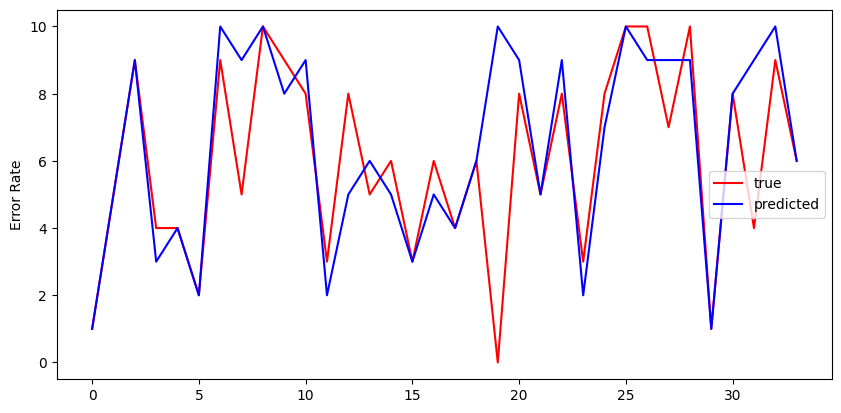

In [10]:
mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(y_test, results)
mse = mse_metric.result().numpy()

mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(y_test, results)
mae = mae_metric.result().numpy()

acc_metric = tf.keras.metrics.Accuracy()
acc_metric.update_state(y_test, results)
acc = acc_metric.result().numpy()
print(f"MSE: {mse}, MAE: {mae}, Accuracy: {acc}")

f = plt.figure()
plt.plot(list(range(len(y_test))), [i for i in y_test], color="red", label="true")
plt.plot(list(range(len(y_test))), [i for i in results], color="blue", label="predicted")
plt.ylabel("Error Rate")
f.set_figwidth(10)
plt.legend()
plt.show()